# Лабораторная работа: Алгоритм Карплуса-Стронга
### Кодуков А.В. 9385

In [91]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt

normal distribution:


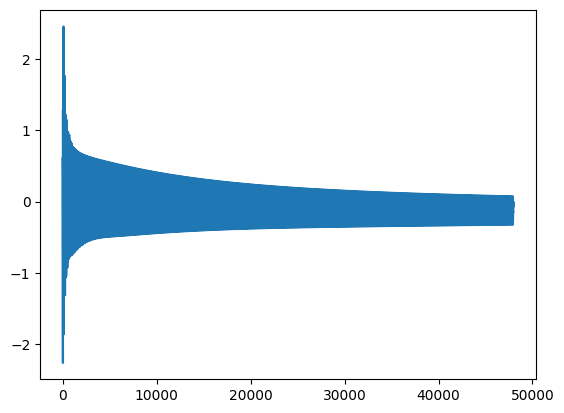

uniform distribution:


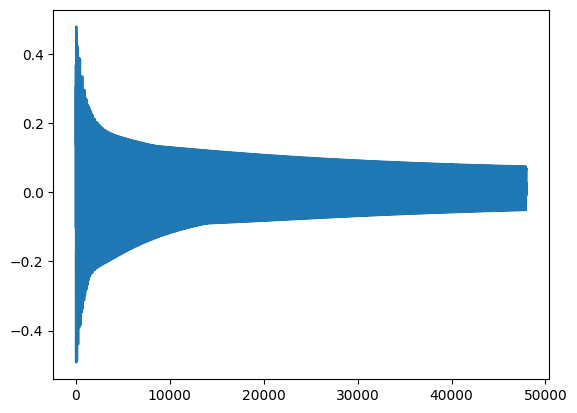

In [92]:
freq = 130.82
dur = 3
sample_rate = 16000

def GuitarString(frequency, duration=1., sample_rate=44100, random="normal", c0=0.5, c1=0.5):
    length = int(sample_rate/frequency)
    total_samples = int(sample_rate * duration)
    
    noise = []
    if random == "normal":
        noise = np.random.normal(0, 1, length)
    if random == "uniform":
        noise = np.random.uniform(-0.5, 0.5, length)
    samples = np.zeros(total_samples)
    for i in range(len(noise)):
        samples[i] = noise[i]
    for i in range(len(noise), len(samples)):
        samples[i] = samples[i - len(noise)] * c1 + samples[i - len(noise) - 1] * c0
 
    return samples

print("normal distribution:")
sound = GuitarString(freq, dur, sample_rate, "normal")
display.display(display.Audio(sound, rate=sample_rate))
plt.plot(sound)
plt.show()

print("uniform distribution:")
sound = GuitarString(freq, dur, sample_rate, "uniform")
display.display(display.Audio(sound, rate=sample_rate))
plt.plot(sound)
plt.show()

In [93]:
melody = [0, 4, 7, None, None, 0, 4, 7, None, None, 5, 9, 12, None, None, 11, 14, 18]

def BuildMusic(melody, frequency, duration=1., sample_rate=44100, random="normal", c0 = 0.5, c1 = 0.5):
    total_samples = int(sample_rate * duration)
    skip = int(0.2 * sample_rate)
    x = np.zeros((total_samples + skip * (len(melody) - 1), len(melody)))
    for i, note in enumerate(melody):
        if note is None:
            x[(i * skip):(len(x[:,i]) - (len(melody) - 1 - i) * skip), i] = np.zeros(total_samples)
        else:
            f0 = frequency * 2 ** (note/12)
            x[(i * skip):(len(x[:,i]) - (len(melody) - 1 - i)* skip), i] = GuitarString(f0, duration, sample_rate, "uniform", c0, c1)
    return x

res = BuildMusic(melody, freq, dur, sample_rate, "normal")
display.display(display.Audio(np.sum(res, axis=1), rate=sample_rate))

In [94]:
for ro in [0.8, 0.85, 0.9, 0.95]:
    print("ro = {}".format(ro))
    res = BuildMusic(melody, freq, dur, sample_rate, "normal", ro / 2, ro / 2)
    display.display(display.Audio(np.sum(res, axis=1), rate=sample_rate))

ro = 0.8


ro = 0.85


ro = 0.9


ro = 0.95


In [95]:
for alpha in [0.25, 0.5, 0.75, 0.95]:
    print("alpha = {}".format(alpha))
    res = BuildMusic(melody, freq, dur, sample_rate, "normal", 1 - alpha, alpha)
    display.display(display.Audio(np.sum(res, axis=1), rate=sample_rate))

alpha = 0.25


alpha = 0.5


alpha = 0.75


alpha = 0.95
